<a href="https://www.kaggle.com/code/moontasirabtahee/linear-regression-on-car-driving-risk-analysis?scriptVersionId=156713343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-driving-risk-analysis/car driving risk analysis.csv


In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Reading CSV file
file = pd.read_csv('/kaggle/input/car-driving-risk-analysis/car driving risk analysis.csv')
file.head()        

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [4]:
# overall report on the dataset
file.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


In [5]:
file.isnull().sum()

speed    0
risk     0
dtype: int64

In [6]:
x = file[['speed']]
y  = file[['risk']]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=1)


In [8]:
x_train.head()

,speed
1,90
13,95
0,200
14,30
9,260


In [9]:
y_train.head()


,risk
1,20
13,18
0,95
14,2
9,91


In [10]:
x_test.head()

,speed
3,110
7,230
6,50
2,300
10,290


In [11]:
y_test.head()

,risk
3,60
7,85
6,7
2,98
10,82


In [12]:
LiReg = LinearRegression()

In [13]:
LiReg.fit(x_train,y_train)

LinearRegression()

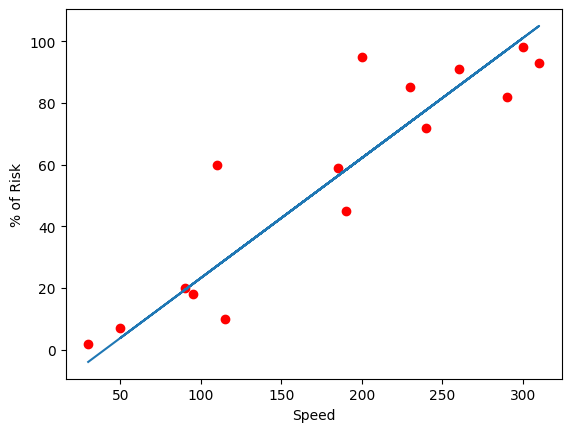

In [14]:
plt.scatter(file[['speed']],file['risk'],marker = 'o',color ='red')
plt.plot(file.speed, LiReg.predict(file[['speed']]))
plt.xlabel('Speed')
plt.ylabel('% of Risk')
plt.show()

In [15]:
accuracy = LiReg.score(x_test,y_test)
print(accuracy)

0.7133824900141749


In [16]:
LiReg.predict([[120]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31.04214392]])

In [17]:
 LiReg.coef_

array([[0.38891318]])

In [18]:
LiReg.intercept_

array([-15.62743727])

In [19]:
# y = mx+c
x = 120
y = LiReg.coef_ * x + LiReg.intercept_ 
print(y)

[[31.04214392]]


# **Manually Generating Gradiant Descent Algorithms for Linear Regression **

In [20]:
x_train = file['speed']
y_train = file['risk']


In [21]:
x_train

0     200
1      90
2     300
3     110
4     240
5     115
6      50
7     230
8     190
9     260
10    290
11    185
12    310
13     95
14     30
Name: speed, dtype: int64

In [22]:
y_train

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

In [23]:
# Gradiant Descent Algo
m = 0 
c = 0 
L = 0.0000001

n = int(len(x_train))
epoch = 1000


for i in range(epoch):
    y_pred = (m * x_train + c)
    deri_m = (-2/n) * sum(x_train*(y_train - y_pred))
    deri_c = (-2/n) * sum(y_train - y_pred)
    
    m = m - (L*deri_m)
    c = c - (L*deri_c)
    
    if m == LiReg.coef_ and c == LiReg.intercept_:
        print('Ntr')
        break
    
print(m,c)



0.3185788435132941 0.001129024160603475


it does not match with the sklearn m and c
